<h1> <center> Regresión Logística </center> </h1>

<p> La regresión logística es un algoritmo de aprendizaje automático de clasificación que se utiliza para predecir la probabilidad de una variable dependiente categórica que sea binaria, es decir, que contega datos codificados como 1 ("Si", "Exito", etc) o 0 ("No, "Fracaso", etc.). Una regresión logistica, por lo tanto, requiere de que la variable dependiente sea binaria. Por tanto, es un método estadístico para predecir clases binarias, del cual obtenemos como resultado una variable dicotómica, es decir dos clases posibles. </p> 
<p> Este algoritmo se basa en la Función Sigmoide </p>
<img src= 'sigmoide2.png',width=400,heigth=1000, alt="Flowers in Chania">
<p> Las librerias y datos que utilizaremos son: </p>

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-whitegrid')
from statsmodels.formula.api  import ols

<h2> Regresión Logística Simple </h2>
Es un método que permite estimar la probabilidad de que una variable cualitativa tome un determinado valor dada una variable cuantitativa. Así el ejemplo clásico es la clasificación binaria que puede obtener un determinado grupo.

<h3> Y el modelo de regresión lineal </h3>
<p>Si la variable de respuesta se codifica en números, como son 0 y 1, entonces es posible realizar un modelo de regresión lineal. Observemos el siguiente ejemplo:</p>

En este caso tenemos un conjunto de datos en el que tenemos el ```default``` de un cliente y su ```balance```. Así, este ejercicio consiste en identificar ¿cuál es la probabilidad de que un cliente caiga en default (es decir, sea asignado 1) dado su balance?



In [2]:
datos = pd.read_csv('datos.csv')
y = np.array(datos['default'])
X = np.array(datos['balance']).reshape((-1, 1))
datos.head()

,default,balance
0,0,729.526495
1,0,817.180407
2,0,1073.549164
3,0,529.250605
4,0,785.655883


Text(0.5, 1.0, 'Regresión Lineal para datos binarios / discretos')

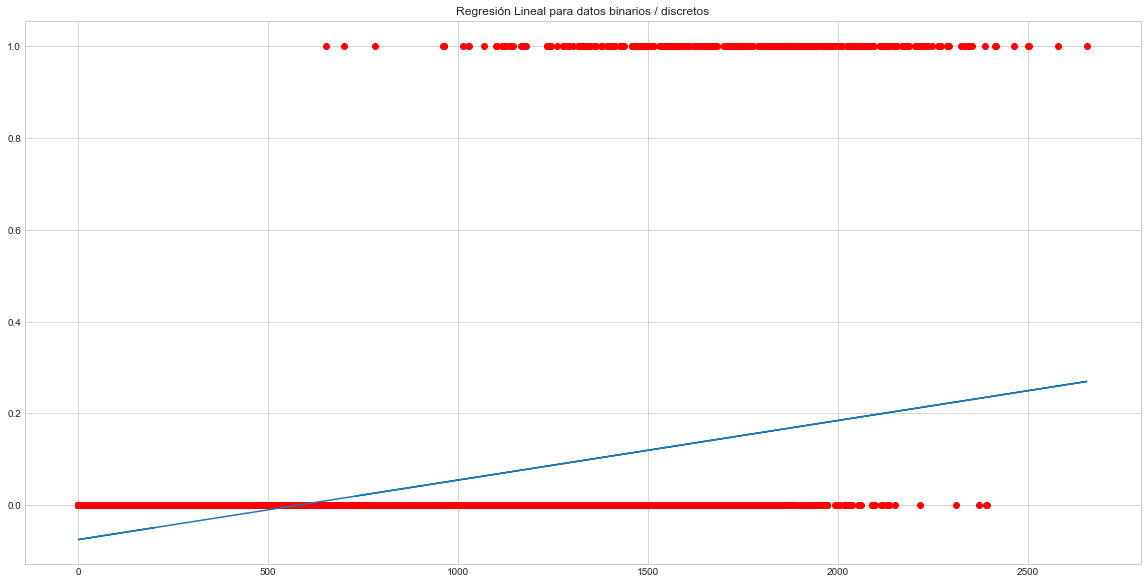

In [3]:
model = LinearRegression()
linear_model = model.fit(X, y)
y_pred = linear_model.predict(X)
plt.figure(figsize=(20,10))
plt.plot(X, y_pred , label = "line 1")
plt.scatter(X, y, label = "line 1", color = 'red')
plt.title('Regresión Lineal para datos binarios / discretos')

En este gráfica observamos que, el modelo de regresión lineal no recoje el comportamiento de los datos de manera adecuada, puesto que se concentra en los datos en torno alrededor de cero

Si visualizamos los resultados obtenidos en el OLS, tenemos que

In [5]:
est = ols(formula = 'default ~  balance', data = datos).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     1397.
Date:                Thu, 21 May 2020   Prob (F-statistic):          2.77e-286
Time:                        19:01:06   Log-Likelihood:                 3644.8
No. Observations:               10000   AIC:                            -7286.
Df Residuals:                    9998   BIC:                            -7271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0752      0.003    -22.416      0.0

El modelo presenta un $R^{2}$ de 0.123, a pesar de las significancias individuales de la variable ```balance``` y el ```intercepto```

### Estimación de un logit
Una regresión logistica se basa en la idea de la regresión lineal, salvo que ajusta el resultado en un número entre 0 y 1. Así entre las funciones más utilizadas se tiene la función sigmoide, la cual establece:

$$\sigma \left ( x \right ) = {\displaystyle \frac{1}{1+e^{-x}}}$$

Esrta también se conoce como la función de distribución acumulada de una regresión logistica. Si $x = \beta_{0}+\beta_{1}x_{1}$, entonces: 

$$ \sigma \left ( x \right ) = {\displaystyle \frac{1}{1+e^{-\beta_{0}-\beta_{1}x_{1}}}}$$

Entonces, si tomamos la pendiente de la curva, tenemos

$${\displaystyle \frac{\partial p_{i}}{\partial x_{i}}=\beta p_{i}\left(1-p_{i}\right)}$$

Esto se conoce como el efecto marginal de $x$ en un evento de probabilidad
Por ejemplo, cuando $\beta = 1$ y $p = 0.5$, un aumento de $1$ unidad en $x$ produce un aumento de $0.25$ en la probabilidad de ocurrencia de un evento. Cuando $\beta$ es más grande, la pendiente de la curva en forma de S y con $p = 0.5$ es más pronunciada. Cuando $\beta$ es negativo, la curva se voltea horizontalmente para que $p$ esté cerca de $1$ cuando $x$ es pequeño y cerca de 0 cuando $x$ es grande. 

In [8]:
vector = np.array([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10])

# def FSigmoide():
nvector = vector*(-1)
npvector =  np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
for x in range(len(nvector)):
    npvector[x] = 1/ 1+math.exp(x)
npvector
plt.plot(vector,npvector)

array([        2,         3,         8,        21,        55,       149,
             404,      1097,      2981,      8104,     22027,     59875,
          162755,    442414,   1202605,   3269018,   8886111,  24154953,
        65659970, 178482301, 485165196,         0])

Sustituyendo $x = \beta_{0}+\beta_{1}x_{1}$, se tiene que:
$$P\left ( Y = k | X = x \right ) = {\displaystyle \frac{e^{\beta_{0}+\beta_{1}x_{1}}}{1+e^{\beta_{0}+\beta_{1}x_{1}}}}$$
<br></br>
<br></br>
Si empleamos la versión logaritmica de la función, tenemos la función de un modelo logístico:

<br/>

$$\ln\left({\displaystyle \frac{P\left(Y=k|X=x\right)}{1-P\left(Y=k|X=x\right)}}\right) = \beta_{0}+\beta_{1}x_{1} $$

Lo anterior se conoce como el logaritmos de los ODDS. ¿Qué es un ODD? Si la probabilidad de que un evento ocurra es de 0.6 y de que no ocurra es de 0.4, ¿Cómo se construye y entiende un ODD?

In [23]:
0.6/0.4

1.4999999999999998

### Ejercicio 2
Genere una matriz de 10x3 tal que:
* La primera columna contenga la probabilidad de que un evento ocurra (un vector/serie de números entre 0 y 1)
* La segunda columna contenga los ODDS relacionados a la primera columna
* La tercera columna contenga el logaritmo natural de los ODDS de la segunda columna

In [81]:
vector1 = np.array([1.1,2,3,4,5,6,7,8,9])/10
vector2 = np.array([None]*9)
vector3 = np.array([None]*9)
for i in range(len(vector1)):
    vector2[i] = vector1[i]/(1-vector1[i])
    vector3[i] = math.log((vector1[i]/(1-vector1[i])))

print(pd.DataFrame(vector1,vector2))
print(pd.DataFrame(vector1,vector3))

             0
0.123596  0.11
0.250000  0.20
0.428571  0.30
0.666667  0.40
1.000000  0.50
1.500000  0.60
2.333333  0.70
4.000000  0.80
9.000000  0.90
              0
-2.090741  0.11
-1.386294  0.20
-0.847298  0.30
-0.405465  0.40
 0.000000  0.50
 0.405465  0.60
 0.847298  0.70
 1.386294  0.80
 2.197225  0.90


Para este caso generemos una regresión logística simple, consulte en que consiste el modulo [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

### Estimación de una regresión Logística
<br/>

$${\displaystyle \frac{P\left(Y=k|X=x\right)}{1-P\left(Y=k|X=x\right)}}=e^{\beta_{0}+\beta_{1}x_{1}}$$

<br/>
Dada esta última ecuación, el siguiente paso consiste en estimar los $\beta 's$ por medio de máxima verosimilitud, este método consiste en encontrar aquellos $\beta 's$ con los que se maximiza la probabilidad de obtener los datos observados.

Tomando la última ecuación, tenemos:

$${\displaystyle \frac{P\left(Y=k|X=x\right)}{1-P\left(Y=k|X=x\right)}}=\prod_{i=0}^{n}{e^{\beta_{i}x_{i}}}$$

Esta ecuación nos dice que los modelos logit son multiplicativos en sus entradas, por lo que $e^{\beta_{i}}$ nos indicara cómo las probabilidades de que la respuesta sea "verdadera" aumentan (o disminuyen) a medida que $x_{i}$ aumenta en una unidad, todas las demás cosas son iguales. Por ejemplo, suponga que ${\beta_{i}} = 0.693$. Entonces $e^{\beta_{i}} = 2$. Si $x_{i}$ es una variable numérica (por ejemplo, edad en años), entonces el aumento de la edad de cada año duplica las probabilidades de que la respuesta sea verdadera; todas las demás cosas son iguales. Mientras que, si $x_{i}$ es una variable binaria (por ejemplo, sexo, con femenino codificado como 1 y el masculino como 0), de manera que si el sujeto es femenino, la respuesta es dos veces más probable que sea verdadera que si el sujeto es masculino, mientras que las demás cosas son iguales.
<br/>
<br/>
<br/>
### Máxima verosimilitud
El estimador de máxima verosimilitud es aquel valor de $\beta's$ que maximiza la funci ́on de máxima verosimilitud, de manera que los $\beta's$ encontrados sean los que mejor describan la distribución de los datos.

Este se categoriza porque en muestras grandes es consistente, eficiente (menor varianza) y normalmente distribuido.

En terminos simples, este metodo busca los parametros que maximicen o minimicen una función, a partir de calcular cada pendiente e identificar cada punto. En el caso de un logístico, al tener independencia en la muestra, podemos derivar e igualar a cero nuestra función de distribución y hallar aquellos valores que maximicen la función.

La función de máxima verosimilitud para una regresión logística, consiste en:
$$ L\left(\left(x^{\left(1\right)},c^{\left(1\right)}\right),...,\left(x^{\left(N\right)},c^{\left(N\right)}\right),\beta_{0},...,\beta_{1}\right) = \prod_{j=1}^{N}{P\left(C=1|x^{\left(j\right)}\right)^{c^{\left(j\right)}}\left(1-P\left(C=1|x^{\left(j\right)}\right)\right)^{1-c^{\left(j\right)}}}
 $$




### Métricas de evaluación del modelo
En este tipo de modelos no tiene sentido hablar de ${R}^{2}$ o $adj{R}^{2}$, lo más cercano que podemos tener de una metrica global es $pseudo{R}^{2}$, el cual ide el grado de mejora en el ajuste del modelo del log de la verosimilitud respecto al modelo sin Xs.

Otros metodos para mirar la significancia global del modelo son:
* **Wald chi-square:** está muy expandido pero pierde precisión con tamaños muestrales pequeños.

* **Likelihood ratio:** usa la diferencia entre la probabilidad de obtener los valores observados con el modelo logístico creado y las probabilidades de hacerlo con un modelo sin relación entre las variables. Para ello, calcula la significancia de la diferencia de residuos entre el modelo con predictores y el modelo nulo (modelo sin predictores). El estadístico tiene una distribución chi-cuadrado con grados de libertad equivalentes a la diferencia de grados de libertad de los dos modelos comparados. Si se compara respecto al modelo nulo, los grados de libertad equivalen al número de predictores del modelo generado. En el libro Handbook for biological statistics se recomienda usar este.

### Condiciones
* **Independencia:** las observaciones tienen que ser independientes unas de otras.

* Relación lineal entre el logaritmo natural de odds y la variable continua: patrones en forma de U son una clara violación de esta condición.

* La regresión logística no precisa de una distribución normal de la variable continua independiente.

* **Número de observaciones:**no existe una norma establecida al respecto, pero se recomienda entre 50 a 100 observaciones. 

Text(0.5, 1.0, 'Regresión Logistica para datos binarios / discretos')

<Figure size 1440x720 with 0 Axes>

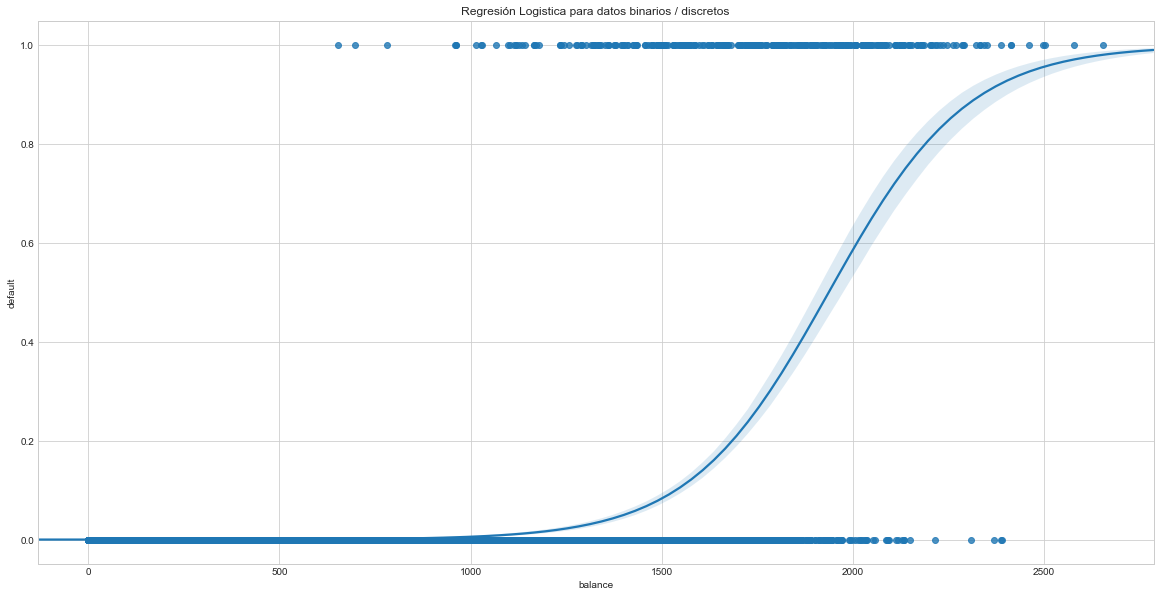

In [7]:
## Ejemplo 1

logit = LogisticRegression(solver='lbfgs')
logit_model = logit.fit(X,y)
y_pred = logit_model.predict(X)
plt.figure(figsize=(20,10))
plt.figure(figsize=(20,10))
sns.regplot(x='balance', y='default', data=datos, logistic=True)
plt.title('Regresión Logistica para datos binarios / discretos')

In [13]:
data = dat

,default,balance
0,0,729.526495
1,0,817.180407
2,0,1073.549164
3,0,529.250605
4,0,785.655883


<h2> Regresión Logística Múltiple </h2>

In [8]:
email_spam = pd.read_csv('email_spam.csv')

In [9]:
email_spam['winner'] = email_spam['winner'].replace({'yes':1, 'no':0})
y = np.array(email_spam["spam"])
X = np.array(email_spam[["intercept","to_multiple","format","cc","attach","dollar", "winner","inherit",
               "password","re_subj","exclaim_subj"]])

In [10]:
logit_model=sm.Logit(y,X)
result=logit_model.fit(method='bfgs')
print(result.summary())

         Current function value: 0.247341
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3921
Model:                          Logit   Df Residuals:                     3910
Method:                           MLE   Df Model:                           10
Date:                Fri, 08 Nov 2019   Pseudo R-squ.:                  0.2041
Time:                        11:36:48   Log-Likelihood:                -969.82
converged:                      False   LL-Null:                       -1218.6
Covariance Type:            nonrobust   LLR p-value:                1.486e-100
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7741      0.089     -8.698      0.000      -0.949      -0.6

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<h2> Ejercicio 3 </h2>

Para el ejercicio anterior:
<ul>
    <li> Para una muestra de entrenamiento del 0.7 estime el modelo de spams </li>
    <li> Evalue las métricas de rendimiento en estos modelos ¿Es bueno el modelo a la hora de predecir?
</ul>